> # Experience Analytics

>> ## Data cleaning

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('..')
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore

>> ### test connection with database

In [2]:
from scripts.dbConnection import test_connection
test_connection

<function scripts.dbConnection.test_connection()>

>> ### get engine

In [3]:
from scripts.dbConnection import get_engine

engine = get_engine()

>> ### read data

In [4]:
query = "SELECT * FROM xdr_data;"
data = pd.read_sql(query, con=engine)

In [5]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


>> ### Check duplicate rows

In [9]:
duplecate = data[data.duplicated]
duplecate

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)


>> ### Observe which column have missing values

In [10]:
missing_columns = data.columns[data.isnull().any()].tolist()

In [11]:
missing_columns

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Total

>> #### show how many data is missed in %

In [12]:
from scripts.dataCleaning import missing_percentage
missing_percentage(data, 0)

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

>>  ## Handling missing values

>>> #### Drop rows where 'Bearer Id' or unique identifiers have missing values

In [13]:
data = data.dropna(subset=['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI'])

In [14]:
missing_percentage(data, 57)

Bearer Id                          0.000000
Start                              0.000000
Start ms                           0.000000
End                                0.000000
End ms                             0.000000
Dur. (ms)                          0.000000
IMSI                               0.000000
MSISDN/Number                      0.000000
IMEI                               0.000000
Last Location Name                 0.107740
Avg RTT DL (ms)                   18.609349
Avg RTT UL (ms)                   18.595882
Avg Bearer TP DL (kbps)            0.000000
Avg Bearer TP UL (kbps)            0.000000
DL TP < 50 Kbps (%)                0.479442
50 Kbps < DL TP < 250 Kbps (%)     0.479442
250 Kbps < DL TP < 1 Mbps (%)      0.479442
DL TP > 1 Mbps (%)                 0.479442
UL TP < 10 Kbps (%)                0.516477
10 Kbps < UL TP < 50 Kbps (%)      0.516477
50 Kbps < UL TP < 300 Kbps (%)     0.516477
UL TP > 300 Kbps (%)               0.516477
HTTP DL (Bytes)                 

In [15]:
important_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']

In [16]:
missing_percentages = (data.isnull().sum() / len(data)) * 100
columns_to_drop = missing_percentages[(missing_percentages > 53) & (~missing_percentages.index.isin(important_columns))].index
# columns_to_drop = missing_percentages[missing_percentages > 53].index
data = data.drop(columns=columns_to_drop)

In [17]:
missing_percentage(data, 0)

Last Location Name                 0.107740
Avg RTT DL (ms)                   18.609349
Avg RTT UL (ms)                   18.595882
TCP DL Retrans. Vol (Bytes)       59.097949
TCP UL Retrans. Vol (Bytes)       64.730045
DL TP < 50 Kbps (%)                0.479442
50 Kbps < DL TP < 250 Kbps (%)     0.479442
250 Kbps < DL TP < 1 Mbps (%)      0.479442
DL TP > 1 Mbps (%)                 0.479442
UL TP < 10 Kbps (%)                0.516477
10 Kbps < UL TP < 50 Kbps (%)      0.516477
50 Kbps < UL TP < 300 Kbps (%)     0.516477
UL TP > 300 Kbps (%)               0.516477
Nb of sec with Vol DL < 6250B      0.480115
Nb of sec with Vol UL < 1250B      0.517151
dtype: float64

>>> #### check if they are numeric or not

In [18]:
from scripts.dataCleaning import drop_row
data= drop_row(data)

>>> #### see the distribution

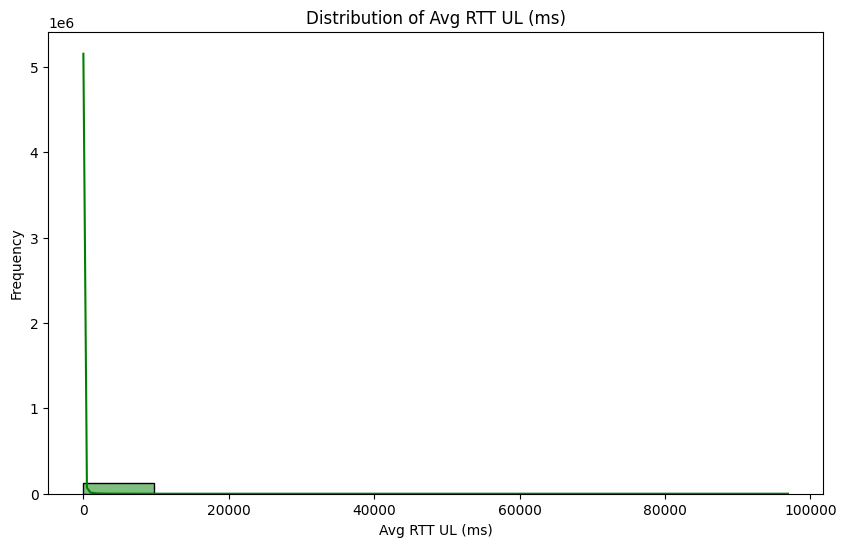

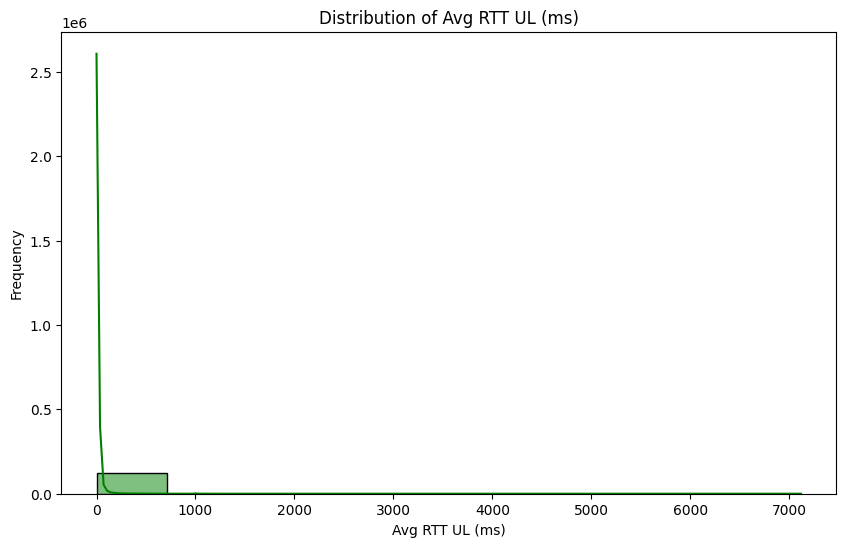

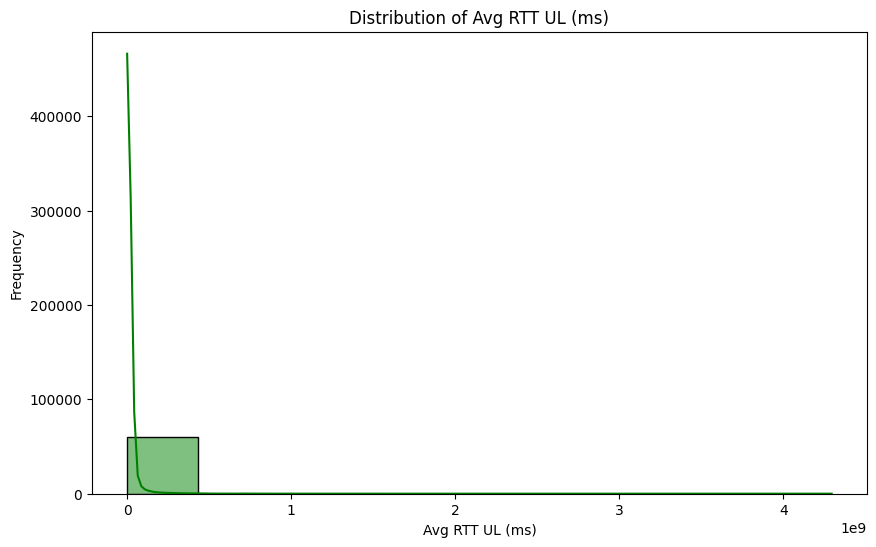

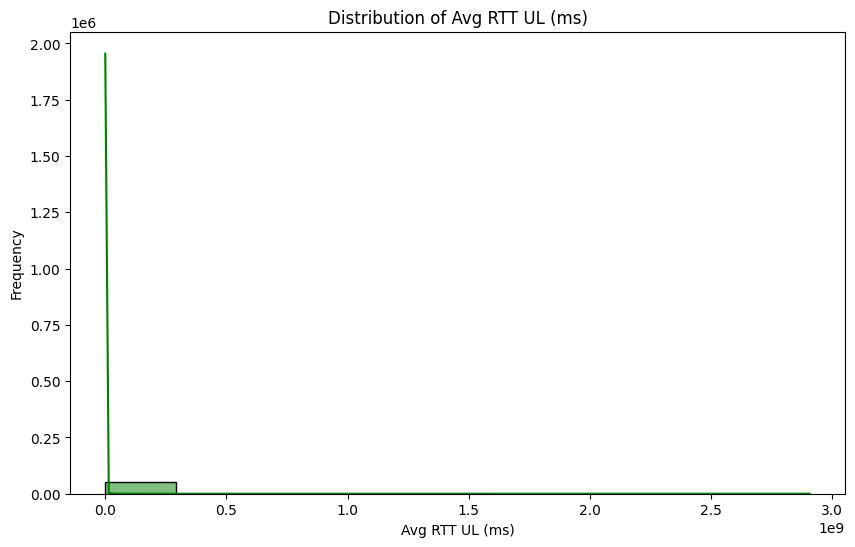

In [19]:
from scripts.histogramPlot import plot_histogram
plot_histogram(data, 'Avg RTT DL (ms)')
plot_histogram(data, 'Avg RTT UL (ms)')
plot_histogram(data, 'TCP DL Retrans. Vol (Bytes)')
plot_histogram(data, 'TCP UL Retrans. Vol (Bytes)')

>>> #### Right skewed

In [20]:
# If 'data' might be a slice of a larger DataFrame
data = data.copy()

from scripts.dataCleaning import fill_missing_values

data= fill_missing_values(data)

In [21]:
missing_percentage(data, 0)

Series([], dtype: float64)

In [22]:
data_description = data.describe()
data_types = data.dtypes

In [23]:
data_types

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

>>> #### Outliers

In [24]:
from scripts.dataCleaning import identify_outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for column in numeric_columns:
    outliers = identify_outliers(data, column)
    outlier_counts[column] = len(outliers)

# Display outlier counts for each column
print("Outlier counts per column:")
outlier_counts

Outlier counts per column:


{'Bearer Id': 0,
 'Start ms': 0,
 'End ms': 0,
 'Dur. (ms)': 7058,
 'IMSI': 13027,
 'MSISDN/Number': 23786,
 'IMEI': 0,
 'Avg RTT DL (ms)': 16789,
 'Avg RTT UL (ms)': 19924,
 'Avg Bearer TP DL (kbps)': 12681,
 'Avg Bearer TP UL (kbps)': 21104,
 'TCP DL Retrans. Vol (Bytes)': 19924,
 'TCP UL Retrans. Vol (Bytes)': 16789,
 'DL TP < 50 Kbps (%)': 18114,
 '50 Kbps < DL TP < 250 Kbps (%)': 14955,
 '250 Kbps < DL TP < 1 Mbps (%)': 29343,
 'DL TP > 1 Mbps (%)': 36594,
 'UL TP < 10 Kbps (%)': 21811,
 '10 Kbps < UL TP < 50 Kbps (%)': 31509,
 '50 Kbps < UL TP < 300 Kbps (%)': 4476,
 'UL TP > 300 Kbps (%)': 2425,
 'Activity Duration DL (ms)': 26127,
 'Activity Duration UL (ms)': 25502,
 'Dur. (ms).1': 7058,
 'Nb of sec with Vol DL < 6250B': 24605,
 'Nb of sec with Vol UL < 1250B': 24875,
 'Social Media DL (Bytes)': 0,
 'Social Media UL (Bytes)': 0,
 'Google DL (Bytes)': 0,
 'Google UL (Bytes)': 0,
 'Email DL (Bytes)': 0,
 'Email UL (Bytes)': 0,
 'Youtube DL (Bytes)': 0,
 'Youtube UL (Bytes)': 0,


>>> ### Treat outliers

In [25]:
from scripts.dataCleaning import cap_outliers

for column in numeric_columns:
    data = cap_outliers(data, column)    

In [26]:
for column in numeric_columns:
    outliers = identify_outliers(data, column)
    outlier_counts[column] = len(outliers)
outlier_counts

{'Bearer Id': 0,
 'Start ms': 0,
 'End ms': 0,
 'Dur. (ms)': 0,
 'IMSI': 0,
 'MSISDN/Number': 0,
 'IMEI': 0,
 'Avg RTT DL (ms)': 0,
 'Avg RTT UL (ms)': 0,
 'Avg Bearer TP DL (kbps)': 0,
 'Avg Bearer TP UL (kbps)': 0,
 'TCP DL Retrans. Vol (Bytes)': 0,
 'TCP UL Retrans. Vol (Bytes)': 0,
 'DL TP < 50 Kbps (%)': 0,
 '50 Kbps < DL TP < 250 Kbps (%)': 0,
 '250 Kbps < DL TP < 1 Mbps (%)': 0,
 'DL TP > 1 Mbps (%)': 0,
 'UL TP < 10 Kbps (%)': 0,
 '10 Kbps < UL TP < 50 Kbps (%)': 0,
 '50 Kbps < UL TP < 300 Kbps (%)': 0,
 'UL TP > 300 Kbps (%)': 0,
 'Activity Duration DL (ms)': 0,
 'Activity Duration UL (ms)': 0,
 'Dur. (ms).1': 0,
 'Nb of sec with Vol DL < 6250B': 0,
 'Nb of sec with Vol UL < 1250B': 0,
 'Social Media DL (Bytes)': 0,
 'Social Media UL (Bytes)': 0,
 'Google DL (Bytes)': 0,
 'Google UL (Bytes)': 0,
 'Email DL (Bytes)': 0,
 'Email UL (Bytes)': 0,
 'Youtube DL (Bytes)': 0,
 'Youtube UL (Bytes)': 0,
 'Netflix DL (Bytes)': 0,
 'Netflix UL (Bytes)': 0,
 'Gaming DL (Bytes)': 0,
 'Gamin

>> ### Task 3.1

In [27]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',


>> #### Aggregate, per customer

In [28]:
from scripts.exprienceAnalytics import agggregate_metrics_per_customer

aggregated = agggregate_metrics_per_customer(data)

In [29]:
aggregated

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput,Handset Type
0,3.360304e+10,27.041413,27.041413,4643.279233,Samsung Galaxy A5 Sm-A520F
1,3.360304e+10,20.000000,20.000000,51.000000,Apple iPhone Xr (A2105)
2,3.360304e+10,17.500000,17.500000,53.000000,Samsung Galaxy J3 (Sm-J330)
3,3.360304e+10,56.000000,56.000000,764.500000,Apple iPhone 6 Plus (A1524)
4,3.360304e+10,22.750000,22.750000,13208.687500,Samsung Galaxy S8 (Sm-G950F)
...,...,...,...,...,...
88752,3.370000e+10,25.000000,25.000000,7.500000,Samsung Galaxy J5 (Sm-J530)
88753,3.370000e+10,57.500000,57.500000,2237.500000,Apple iPhone 6 (A1586)
88754,3.370000e+10,14.500000,14.500000,4096.000000,Huawei P9 Lite
88755,3.370000e+10,25.000000,25.000000,7.500000,Samsung Galaxy J7


>> #### Compute & list 10 of the top, bottom, and most frequent

In [30]:
from scripts.exprienceAnalytics import most_frequent

results = most_frequent(aggregated)

In [31]:
results

,Metric,Top 10,Bottom 10,Most Frequent
0,Avg_TCP_Retransmission,"63.5, 63.5, 63.5, 63.5, 63.5, 63.5, 63.5, 63.5...","0.0, 0.0, 1.0, 2.0, 2.5, 3.0, 4.0, 4.5, 4.5, 5.0",25.000
1,Avg_RTT,"63.5, 63.5, 63.5, 63.5, 63.5, 63.5, 63.5, 63.5...","0.0, 0.0, 1.0, 2.0, 2.5, 3.0, 4.0, 4.5, 4.5, 5.0",25.000
2,Avg_Throughput,"26381.875, 26381.875, 26381.875, 26381.875, 26...","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0",26381.875


>> #### Distribution and Interpretation

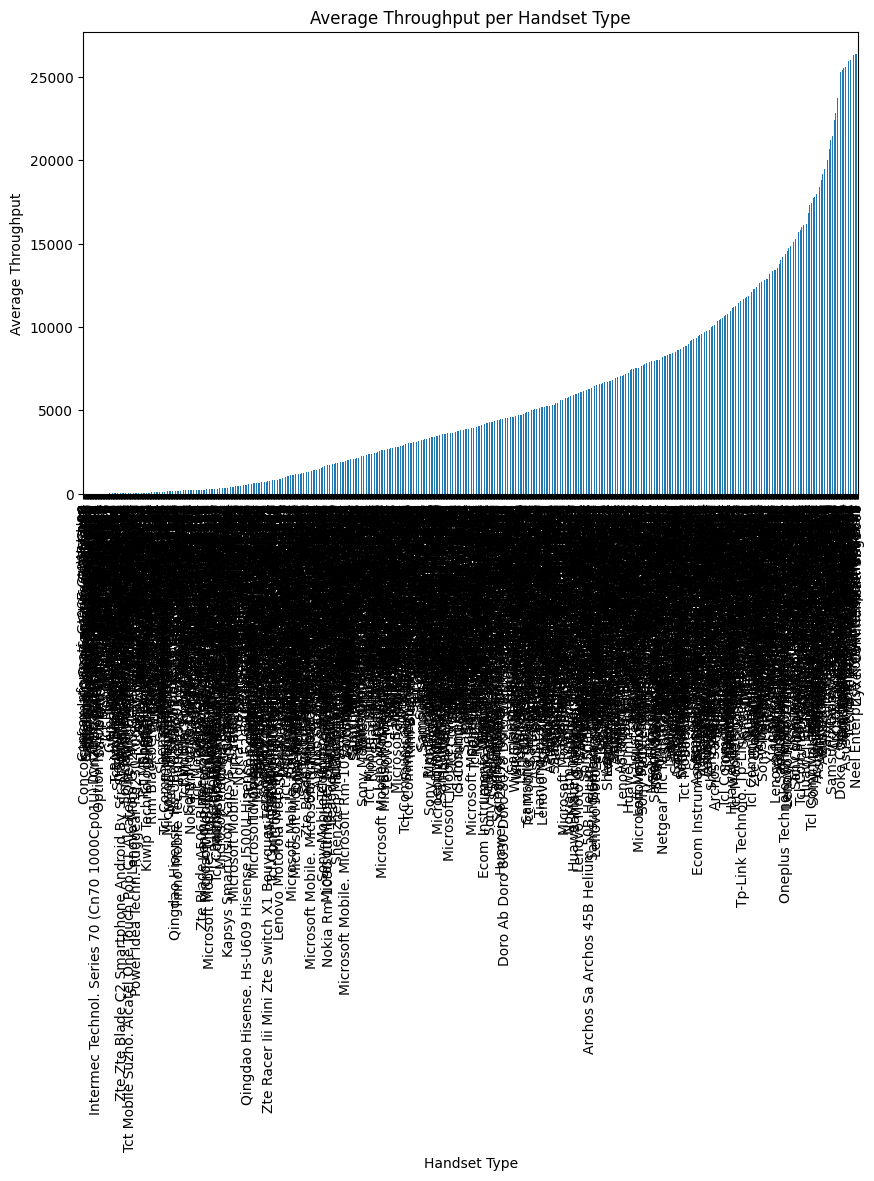

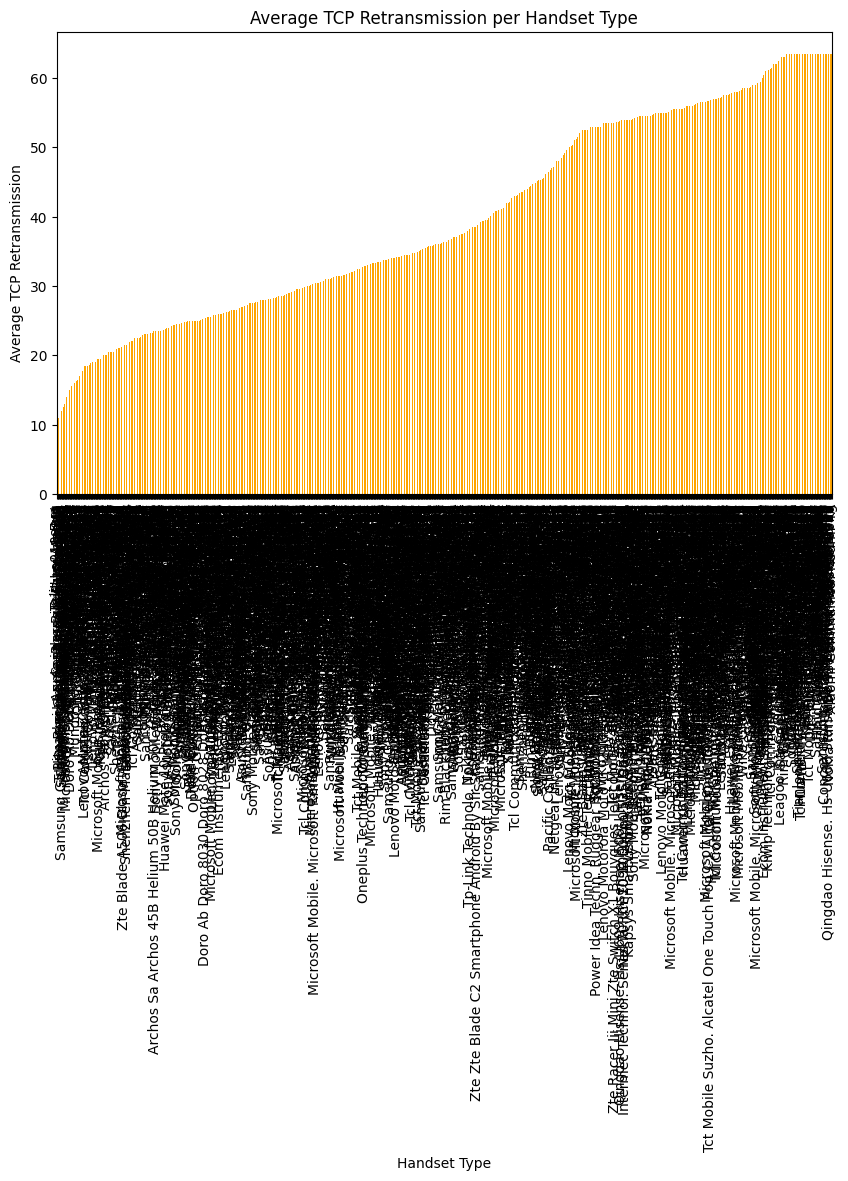

In [32]:
from scripts.exprienceAnalytics import distribution_and_interpretation
distribution_and_interpretation(aggregated)